# Earthquake Damage

We're trying to predict the ordinal variable damage_grade, which represents a level of damage to the building that was hit by the earthquake. There are 3 grades of the damage:

* 1 represents low damage
* 2 represents a medium amount of damage
* 3 represents almost complete destruction

The data was collected through surveys by Kathmandu Living Labs and the Central Bureau of Statistics, which works under the National Planning Commission Secretariat of Nepal. This survey is one of the largest post-disaster datasets ever collected, containing valuable information on earthquake impacts, household conditions, and socio-economic-demographic statistics.

We are predicting the level of damage from 1 to 3. The level of damage is an ordinal variable meaning that ordering is important. This can be viewed as a classification or an ordinal regression problem. (Ordinal regression is sometimes described as an problem somewhere in between classification and regression.)

# Libraries

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# Data

In [4]:
# Load the labels
labels = pd.read_csv('data/train_labels.csv')
labels.head()

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3


In [12]:
# Check out the size
labels.shape

(260601, 2)

In [5]:
# Load the values
values = pd.read_csv('data/train_values.csv')
values.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0


In [13]:
# Check out the shape
values.shape

(260601, 39)

In [21]:
# Merge labels and values into on dataframe
df = pd.merge(labels, values)
df.head()

# Why does concat never work for me?
# df = pd.concat([labels, values], axis=1)

,building_id,damage_grade,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,3,6,487,12198,2,30,6,5,t,...,0,0,0,0,0,0,0,0,0,0
1,28830,2,8,900,2812,2,10,8,7,o,...,0,0,0,0,0,0,0,0,0,0
2,94947,3,21,363,8973,2,10,5,5,t,...,0,0,0,0,0,0,0,0,0,0
3,590882,2,22,418,10694,2,10,6,5,t,...,0,0,0,0,0,0,0,0,0,0
4,201944,3,11,131,1488,3,30,8,9,t,...,0,0,0,0,0,0,0,0,0,0


# Explore

In [22]:
# Total df shape
df.shape

(260601, 40)

In [23]:
# Basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 0 to 260600
Data columns (total 40 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   damage_grade                            260601 non-null  int64 
 2   geo_level_1_id                          260601 non-null  int64 
 3   geo_level_2_id                          260601 non-null  int64 
 4   geo_level_3_id                          260601 non-null  int64 
 5   count_floors_pre_eq                     260601 non-null  int64 
 6   age                                     260601 non-null  int64 
 7   area_percentage                         260601 non-null  int64 
 8   height_percentage                       260601 non-null  int64 
 9   land_surface_condition                  260601 non-null  object
 10  foundation_type                         260601 non-null 

In [18]:
# Again we see there arn't any missing values
df.isnull().sum()

building_id                               0
damage_grade                              0
building_id                               0
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar

In [24]:
# Continuous features stats
df.describe()

,building_id,damage_grade,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
count,2.606010e+05,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,...,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
mean,5.256755e+05,2.238272,13.900353,701.074685,6257.876148,2.129723,26.535029,8.018051,5.434365,0.088645,...,0.064378,0.033626,0.008101,0.000940,0.000361,0.001071,0.000188,0.000146,0.000088,0.005119
std,3.045450e+05,0.611814,8.033617,412.710734,3646.369645,0.727665,73.565937,4.392231,1.918418,0.284231,...,0.245426,0.180265,0.089638,0.030647,0.018989,0.032703,0.013711,0.012075,0.009394,0.071364
min,4.000000e+00,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.611900e+05,2.000000,7.000000,350.000000,3073.000000,2.000000,10.000000,5.000000,4.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.257570e+05,2.000000,12.000000,702.000000,6270.000000,2.000000,15.000000,7.000000,5.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.897620e+05,3.000000,21.000000,1050.000000,9412.000000,2.000000,30.000000,9.000000,6.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.052934e+06,3.000000,30.000000,1427.000000,12567.000000,9.000000,995.000000,100.000000,32.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


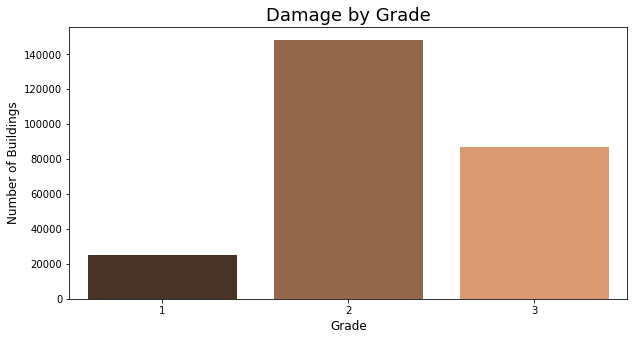

In [68]:
# Look at the damage_grades - looks pretty unbalanced
import seaborn as sns

damange_count  = df['damage_grade'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(x=damange_count.index, y=damange_count.values, palette='copper')
plt.title('Damage by Grade', fontsize=18)
plt.ylabel('Number of Buildings', fontsize=12)
plt.xlabel('Grade', fontsize=12)
plt.show()

* 1 represents low damage
* 2 represents a medium amount of damage
* 3 represents almost complete destruction

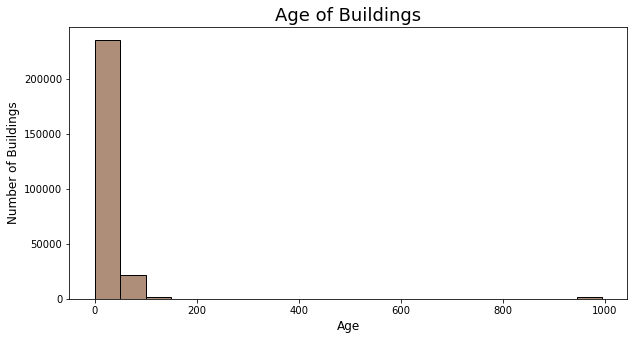

In [97]:
# Age of buildings is going to be an issue.
plt.figure(figsize=(10,5))
sns.histplot(data=df, x="age", bins=20, color='#93684b')
plt.title('Age of Buildings', fontsize=18)
plt.ylabel('Number of Buildings', fontsize=12)
plt.xlabel('Age', fontsize=12)
plt.show()

In [98]:
df.age.mean()

26.535028645323695

In [99]:
df.age.max()

995

In [100]:
df.age.std()

73.56593652273533

In [101]:
df.age.std()*3

220.69780956820597

In [111]:
df.age.mean() + df.age.std()*3

247.23283821352967

In [110]:
df.age[[df.age > (df.age.mean() + df.age.std()*3)]]

ValueError: PandasArray must be 1-dimensional.

In [112]:
sum(i > (df.age.mean() + df.age.std()*3) for i in df.age)

1390

In [75]:
objects = ['land_surface_condition','foundation_type','roof_type','ground_floor_type',
           'other_floor_type','position','plan_configuration','legal_ownership_status']

In [76]:
# One-hot encoding objects is going to add 30 more columns (with drop_first = True)
total = 0
for obj in objects:
    print(df[obj].value_counts())
    num = df[obj].value_counts().count()
    total += num
total

t    216757
n     35528
o      8316
Name: land_surface_condition, dtype: int64
r    219196
w     15118
u     14260
i     10579
h      1448
Name: foundation_type, dtype: int64
n    182842
q     61576
x     16183
Name: roof_type, dtype: int64
f    209619
x     24877
v     24593
z      1004
m       508
Name: ground_floor_type, dtype: int64
q    165282
x     43448
j     39843
s     12028
Name: other_floor_type, dtype: int64
s    202090
t     42896
j     13282
o      2333
Name: position, dtype: int64
d    250072
q      5692
u      3649
s       346
c       325
a       252
o       159
m        46
n        38
f        22
Name: plan_configuration, dtype: int64
v    250939
a      5512
w      2677
r      1473
Name: legal_ownership_status, dtype: int64


38

# Cleaning

Best Practices - split out a separate test set, tune hyperparameters, or implement cross-validation

# Train/Test

In [ ]:
# Create a dataset that is balanced!

# Separate majority and minority classes
df_majority = df[df.balance==0]
df_minority = df[df.balance==1]
 
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=49,     # to match minority class
                                 random_state=123) # reproducible results
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
df_downsampled.balance.value_counts()
# 1    49
# 0    49
# Name: balance, dtype: int64

# Model

In [ ]:
# Baseline Logistic Regession Model

# Separate input features (X) and target variable (y)
y = df.balance
X = df.drop('balance', axis=1)
 
# Train model
clf_0 = LogisticRegression().fit(X, y)
 
# Predict on training set
pred_y_0 = clf_0.predict(X)

In [ ]:
# Using Support Vectors with "balance"

# Separate input features (X) and target variable (y)
y = df.balance
X = df.drop('balance', axis=1)
 
# Train model
clf_3 = SVC(kernel='linear', 
            class_weight='balanced', # penalize
            probability=True)
 
clf_3.fit(X, y)
 
# Predict on training set
pred_y_3 = clf_3.predict(X)
 
# Is our model still predicting just one class?
print( np.unique( pred_y_3 ) )
# [0 1]
 
# How's our accuracy?
print( accuracy_score(y, pred_y_3) )
# 0.688
 
# What about AUROC?
prob_y_3 = clf_3.predict_proba(X)
prob_y_3 = [p[1] for p in prob_y_3]
print( roc_auc_score(y, prob_y_3) )
# 0.5305236678

In [ ]:
# Random Forest - good for imbalanced datasets!

# Separate input features (X) and target variable (y)
y = df.balance
X = df.drop('balance', axis=1)
 
# Train model
clf_4 = RandomForestClassifier()
clf_4.fit(X, y)
 
# Predict on training set
pred_y_4 = clf_4.predict(X)
 
# Is our model still predicting just one class?
print( np.unique( pred_y_4 ) )
# [0 1]
 
# How's our accuracy?
print( accuracy_score(y, pred_y_4) )
# 0.9744
 
# What about AUROC?
prob_y_4 = clf_4.predict_proba(X)
prob_y_4 = [p[1] for p in prob_y_4]
print( roc_auc_score(y, prob_y_4) )
# 0.999078798186

# Conclusion

# Future Work

# Submission